# Calligaro Nicolas
## Statistique sur les données de la course

## Idée :
pour chaque skipper :
Donner ses boxplot vitesse, vmg, distance
Top 3
Meilleur sprinteur (Vmax)
Plus efficiant (VMG max)


In [1]:
import pandas as pd
import datetime as dt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as iws
df_clas=pickle.Unpickler(open("df_clas.pkl",'rb')).load()
df_tech=pickle.Unpickler(open("df_tech.pkl",'rb')).load()
df_clas.shape,df_tech.shape

((4142, 23), (33, 22))

# Top3

In [3]:
df_clean= df_clas.drop(df_clas.columns[[1,4,5,6,8,9,22]],axis=1)
df_clean.sort_values(by = '2 Vitesse',ascending = False).iloc[0:10]['Skipper'].value_counts().head(3)

charlie dalin       4
jeremie beyou       1
nicolas troussel    1
Name: Skipper, dtype: int64

#### On voit le classement du skipper le plus rapide le plus grand nombre de fois

In [4]:
df_clean.sort_values(by = '2 VMG',ascending = False).iloc[0:10]['Skipper'].value_counts().head(3)

charlie dalin    5
thomas ruyant    4
alex thomson     1
Name: Skipper, dtype: int64

#### On voit le classement du skipper qui suit généralement la meilleur trajectoire

# Stat par skipper

In [5]:
choice = iws.Dropdown(
    options=list(df_tech.Skipper),
    value=list(df_tech.Skipper)[0],
    description='Choix du Skipper:',
    disabled=False,
)
display(choice)

Dropdown(description='Choix du Skipper:', options=('jean le cam', 'armel tripon', 'sebastien simon', 'nicolas …

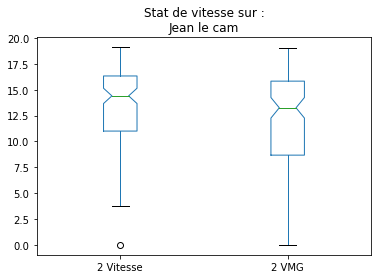

In [6]:
skipper = df_tech[df_tech.Skipper == choice.value].index[0]
df_group = df_clean.groupby('Num_voile')
#plt.boxplot ([df_group.get_group(skipper)['2 Vitesse'],df_group.get_group(2)['2 VMG']]);


(df_group.get_group(skipper)[['2 Vitesse','2 VMG']]).plot(kind='box'
                                                          ,notch=True
                                                          ,widths =0.2
                                                          ,title = f'Stat de vitesse sur :\n{choice.value.capitalize()}'
                                                         );

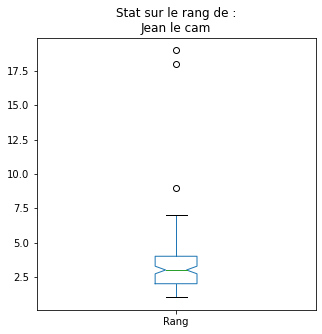

In [7]:
df_group.get_group(skipper)['Rang'].plot(kind='box'
                                         ,figsize=(5,5)
                                         ,notch=True
                                        ,title = f'Stat sur le rang de :\n{choice.value.capitalize()}'
                                        );